In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_breast_cancer, make_classification, load_wine, load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);



### 1. zadatak

Pogledajmo par umjetno konstruiranih skupova podataka

In [4]:
wine = load_wine()

print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
X_all = wine['data']
y_all = wine['target']

# za sada radimo samo s dvije klase
X = X_all[y_all != 0]
y = y_all[y_all != 0]
#y -= 1
print(X.shape)
print(y.shape)


cl = LogisticRegression(max_iter=5000,)
cl.fit(X, y)
pred = cl.predict(X)
print(cl.score(X,y))
print(accuracy_score(y, pred))
print(confusion_matrix(y, pred))
print(cl.coef_)


(119, 13)
(119,)
1.0
1.0
[[71  0]
 [ 0 48]]
[[ 0.49417314  0.75053054  0.29559391  0.10241297  0.03728382 -0.40136707
  -1.40920066 -0.11075797 -0.62754819  1.40710676 -0.41869056 -0.80844107
   0.00523168]]


In [6]:
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
X, y = cancer['data'], cancer['target']

clf = LogisticRegression(max_iter=3000)

clf.fit(X,y)


pred = clf.predict(X)
print(accuracy_score(y, pred))
print(confusion_matrix(y, pred))

0.9578207381370826
[[197  15]
 [  9 348]]


/home/mislav/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
phi = PolynomialFeatures(degree=2).fit_transform(X)

scaler = StandardScaler()
#phi = scaler.fit_transform(phi)

clf = LogisticRegression(max_iter=3000)

clf.fit(phi,y)

print(clf.coef_.shape)


pred = clf.predict(phi)
print(accuracy_score(y, pred))
print(confusion_matrix(y, pred))

(1, 496)
0.9894551845342706
[[209   3]
 [  3 354]]


/home/mislav/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=3000)

clf.fit(X_train,y_train)


pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


0.9560439560439561
0.9649122807017544
[[40  1]
 [ 3 70]]


In [10]:
poly = PolynomialFeatures(degree=2)
scale = StandardScaler()

phi_train = poly.fit_transform(X_train)
phi_test = poly.fit_transform(X_test)

phi_train = scale.fit_transform(phi_train)
phi_test = scale.fit_transform(phi_test)

clf = LogisticRegression(max_iter=1000)

clf.fit(phi_train,y_train)



pred = clf.predict(phi_test)
print(clf.score(phi_train,y_train))
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9934065934065934
0.9736842105263158
[[40  1]
 [ 2 71]]


In [11]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

1.0
[[50  0]
 [ 0 50]]
(100, 2)
[[ 3.08267284 -3.01867739]]


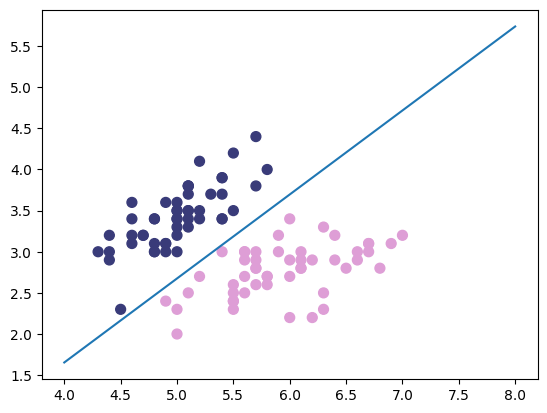

In [12]:
X = iris['data']
y = iris['target']

X = X[y != 2][:,[0,1]]
y = y[y != 2]


clf = LogisticRegression()
clf.fit(X, y)

pred = clf.predict(X)

print(accuracy_score(y, pred))
print(confusion_matrix(y, pred))



print(X.shape)
print(clf.coef_)

a = clf.coef_[0][0]
b = clf.coef_[0][1]
c = clf.intercept_

# ax + by + c = 0
# y = -(a/b)x - c/b

ls = np.linspace(4, 8, 100)

ys = -(a/b)*ls - c/b


plot_2d_clf_problem(X, y)
plt.plot(ls, ys)
#plt.ylim((1.9, 3.8))


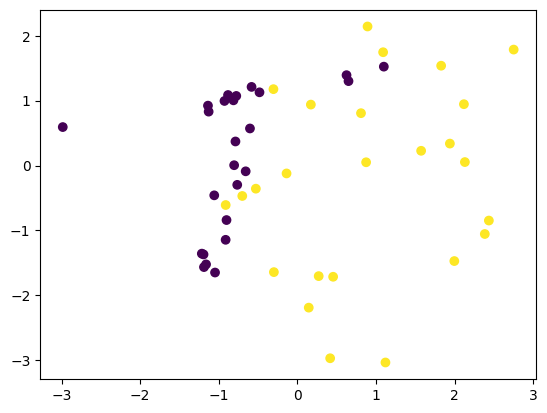

In [13]:
X, y = make_classification(
    n_samples=50,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2
)

plt.scatter(X[:,0], X[:,1], c=y)

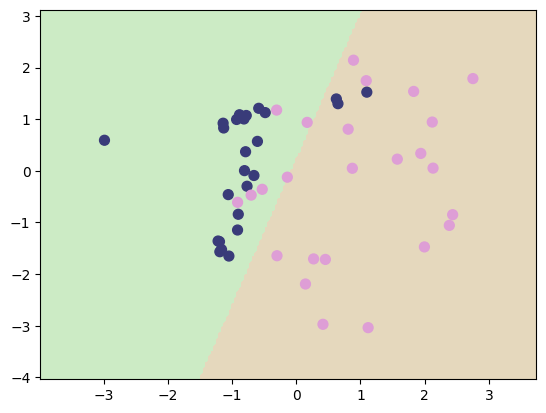

In [14]:
clf = LogisticRegression()
clf.fit(X,y)

plot_2d_clf_problem(X,y, lambda x: clf.predict(x) > 0.5)

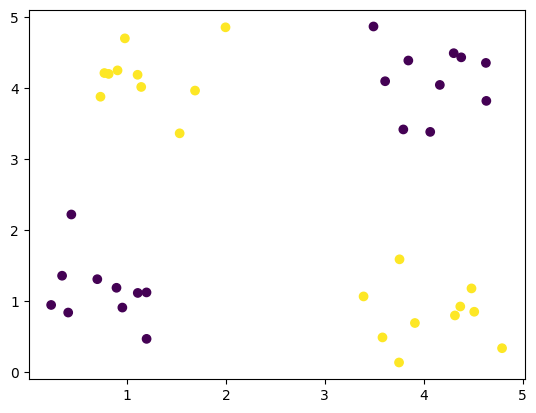

In [15]:
def make_quad(n_per_quad=10, centers=None, center_labels=None, cov_matrix=None):
    if centers is None:
        centers = np.array([
            [1,1],
            [1,4],
            [4,4],
            [4,1]
        ])

    if center_labels is None:
        center_labels = [0,1,0,1]


    if cov_matrix is None:
        cov_matrix = [[0.2, 0], [0, 0.2]]

    X, y = [], []
    for center, label in zip(centers, center_labels):
        points = np.random.multivariate_normal(mean=center,cov=cov_matrix, size=n_per_quad)
        X.append(points)
        y.extend([label] * n_per_quad)

    X = np.vstack(X)
    y = np.array(y)

    return X,y    

    
X, y = make_quad(10)

plt.scatter(X[:,0], X[:,1], c=y)

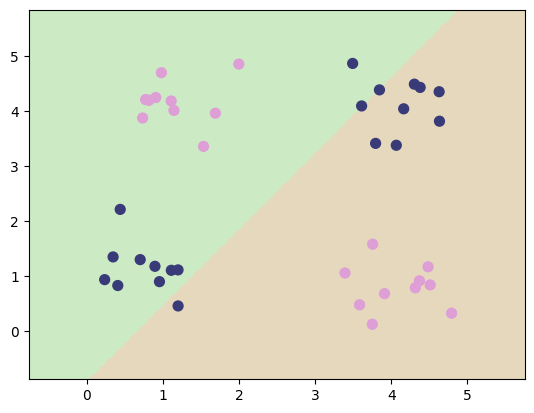

In [16]:
clf = LogisticRegression()
clf.fit(X,y)

plot_2d_clf_problem(X,y, lambda x: clf.predict(x) > 0.5)

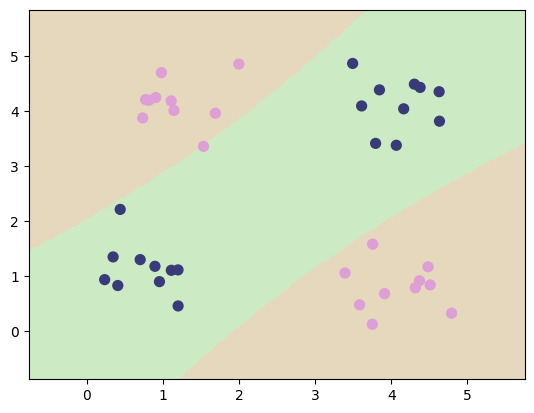

In [17]:
clf = LogisticRegression()
poly = PolynomialFeatures(degree=2)
phi = poly.fit_transform(X)
clf.fit(phi,y)

plot_2d_clf_problem(X,y, lambda x: clf.predict(poly.transform(x)) > 0.5)

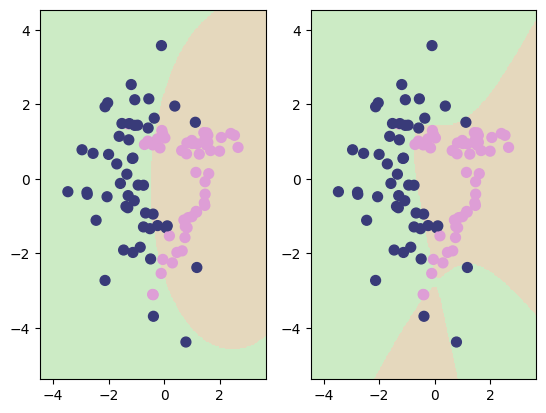

In [21]:
X,y = make_classification(n_samples=100,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0)

clf = LogisticRegression()
poly = PolynomialFeatures(degree=2)
phi = poly.fit_transform(X)
clf.fit(phi,y)

plt.subplot(1,2,1)
plot_2d_clf_problem(X,y, lambda x: clf.predict(poly.transform(x)) > 0.5)


clf = LogisticRegression()
poly = PolynomialFeatures(degree=3)
phi = poly.fit_transform(X)
clf.fit(phi,y)

plt.subplot(1,2,2)
plot_2d_clf_problem(X,y, lambda x: clf.predict(poly.transform(x)) > 0.5)


